In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import random
from numpy.linalg import norm

import time
from google.colab import files
from tools import Kaczmarz_methods, soft_skrinkage

In [2]:
# Fixing random state for reproducibility
np.random.seed(1234)

# Toy Example

In [3]:
# Create the toy example

m = 700  # number of equation
n = 700  # number of unknown

lambda_rk = 0
lambda_rsk = 15 # sparsity parameter lambda for our ARBK and BK method

A = np.random.randn(m,n)

# Generating the true solution
u = np.random.randn(m,1)
x_true = soft_skrinkage(A.T @ u, lambda_rsk)

b = A @ x_true
# set tolerance and maximum number of iterations
tol = 1e-6

print(f'Shape of A {A.shape}')
print(f'Shape of the true solution {x_true.shape}')
print(f'Shape of b {b.shape}')
print(f'condition number of A {np.linalg.cond(A)}')
print(f'# nonzeros components of x^*: {n - np.sum(x_true == np.zeros((n,1)))}, percentage : {100 *(n - np.sum(x_true == np.zeros((n,1))))/n} %')

Shape of A (700, 700)
Shape of the true solution (700, 1)
Shape of b (700, 1)
condition number of A 1150.069854555673
# nonzeros components of x^*: 404, percentage : 57.714285714285715 %


# Implementation of differents methods:
  - Randomized Bregman Kaczmarz method (BK)
  - Accelerated Randomized Bregman Kaczmarz method (ARBK)
  - Nesterov Randomized Bregman Kaczmarz method (NRBK)
  - Restarted Accelerated Randomized Bregman Kaczmarz method (RARBK)

In [4]:
max_iter = int(200* max(m,n))

alpha = 1
number_block = int(m/2)
Time_record = dict()

In [5]:
# Fix the block partition
index_list = list([i for i in range(m)])
copy_index_list = index_list.copy()
Partition_lists = np.array_split(copy_index_list, number_block)

In [6]:
#@title : Accelerated Randomized Bregman Kaczmarz method (ARBK)

# Run the Accelerated Randomized Bregman Kaczmarz method (ARBK)
y_start_arbk = np.zeros((m, 1))
method_arbk = 'ARBK'

Funct_values = []
Errors = []
Residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_arbk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
y_arbk, Funct_values_arbk, Errors_arbk, Residuals_arbk, sparsity_sol_arbk  = Kaczmarz_methods(A, b, y_start_arbk, x_true, max_iter, lambda_rsk,
                                                                                              number_block, alpha, Funct_values, Errors, Residuals,
                                                                                              sparsity_sol, tol, method_arbk, p_list=Partition_lists)

end = time.time()
Time_record[method_arbk+ f'-{number_block}'] = end - start
print(f'The Randomized Accelerated Bregman Kaczmarz will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_arbk))

Method = ARBK : number of blocks = 350, alpha = 1, lambda = 15 for 140000 iterations
The Randomized Accelerated Bregman Kaczmarz will run for a total of 140000 iterations in 44.419196367263794 sec. 

102


In [7]:
#@title : Randomized Bregman Kaczmarz method (BK)

y_start_bk = np.zeros((m, 1))
method_bk = 'BK'
funct_values = []

errors = []
residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_bk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
y_bk, Funct_values_bk, Errors_bk, Residuals_bk, sparsity_sol_bk  = Kaczmarz_methods(A, b, y_start_bk, x_true, max_iter, lambda_rsk,
                                                                                              number_block, alpha, funct_values, errors,
                                                                                    residuals, sparsity_sol, tol, method_bk, p_list=Partition_lists)

end = time.time()
Time_record[method_bk + f'-{number_block}'] = end - start
print(f'The Randomized Bregman Kaczmarz will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_bk))

Method = BK : number of blocks = 350, alpha = 1, lambda = 15 for 140000 iterations
The Randomized Bregman Kaczmarz will run for a total of 140000 iterations in 52.92633128166199 sec. 

200


In [8]:
#@title : Nesterov Randomized Bregman-Kaczmarz (NRBK)

y_start_nrbk = np.zeros((m, 1))
method_nrbk = 'NRBK'

Errors = []
Funct_values = []
Residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_nrbk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
y_nrbk, Funct_values_nrbk, Errors_nrbk, Residuals_nrbk, sparsity_sol_nrbk  = Kaczmarz_methods(A, b, y_start_nrbk, x_true, max_iter, lambda_rsk,
                                                                                              number_block, alpha, Funct_values, Errors, Residuals,
                                                                                              sparsity_sol, tol, method_nrbk, p_list=Partition_lists)

end = time.time()
Time_record[method_nrbk + f'-{number_block}'] = end - start
print(f'The Nesterov Accelerated Coordinate Descent will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_nrbk))

Method = NRBK : number of blocks = 350, alpha = 1, lambda = 15 for 140000 iterations
The Nesterov Accelerated Coordinate Descent will run for a total of 140000 iterations in 61.91083264350891 sec. 

200


In [9]:
# differents restarts

K = 200*number_block
Restart_periods = [K for i in range(int(max_iter/(K)))]
Restart_periods.append(max_iter - sum(Restart_periods))
num_restart = len(Restart_periods)


print(f'Repeat after {Restart_periods[0]} iterations, number of restart is {num_restart}, Total number of iterations is {max_iter}')

Repeat after 70000 iterations, number of restart is 3, Total number of iterations is 140000


In [10]:
#@title : Accelerated Randomized Bregman Kaczmarz method (ARBK) with restart

y_start_rarbk = np.zeros((m, 1))
method_arbk = 'ARBK'

Funct_values = []
Errors = []
Residuals = []
sparsity_sol = [n - np.sum(soft_skrinkage(A.T @ y_start_rarbk, lambda_rsk) == np.zeros((n,1)))]

start = time.time()
for restart in range(num_restart):
  y_rarbk, Funct_values_rarbk, Errors_rarbk, Residuals_rarbk, sparsity_sol_rarbk  = Kaczmarz_methods(A, b, y_start_rarbk, x_true, Restart_periods[restart], lambda_rsk,
                                                                                              number_block, alpha, Funct_values, Errors, Residuals,
                                                                                                     sparsity_sol, tol, method_arbk, p_list=Partition_lists)
  if min(Errors_rarbk[-1],Residuals_rarbk[-1]) <= tol :
    break
  x_k = soft_skrinkage(A.T @ y_rarbk, lambda_rsk)
  x_k_previous = soft_skrinkage(A.T @ y_start_rarbk, lambda_rsk)
  f_v_y = 0.5*(np.linalg.norm(x_k)**2) - b.T @ y_rarbk
  f_v_y_previous = 0.5*(np.linalg.norm(x_k_previous)**2) - b.T @ y_start_rarbk
  # condition to choose the iterate
  if f_v_y <= f_v_y_previous :
    # print('New Iterate choosen')
    y_start_rarbk = y_rarbk
  else:
    # print('Old Iterate choosen')
    y_start_rarbk = y_start_rarbk
  Funct_values, Errors, Residuals, sparsity_sol = Funct_values_rarbk, Errors_rarbk, Residuals_rarbk, sparsity_sol_rarbk

end = time.time()
Time_record['R' + method_arbk + f'-{number_block}'] = end - start
print(f'The Randomized Accelerated Bregman Kaczmarz will run for a total of {max_iter} iterations in {end - start} sec. \n')
print(len(Funct_values_rarbk))

Method = ARBK : number of blocks = 350, alpha = 1, lambda = 15 for 70000 iterations
The Randomized Accelerated Bregman Kaczmarz will run for a total of 140000 iterations in 24.795825481414795 sec. 

86


In [11]:
Time_record

{'ARBK-350': 44.419196367263794,
 'BK-350': 52.92633128166199,
 'NRBK-350': 61.91083264350891,
 'RARBK-350': 24.795825481414795}

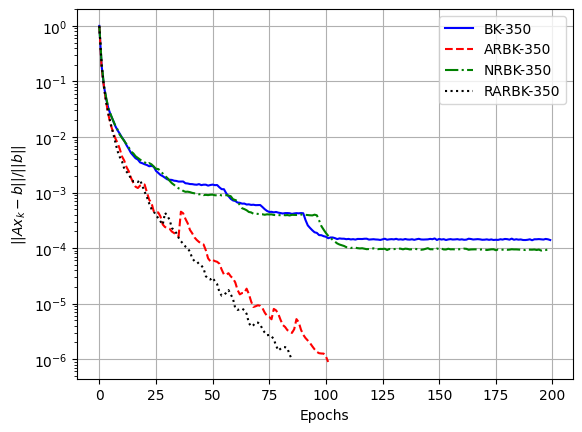

In [12]:
#@title : Residuals plots

plt.grid(True)
# plt.title('Residuals')
plt.semilogy(Residuals_bk, label= 'BK'+ f'-{number_block}', color='blue')
plt.semilogy(Residuals_arbk, linestyle='dashed', label= 'ARBK'+ f'-{number_block}', color='red')
plt.plot(Residuals_nrbk, linestyle='-.',label= 'NRBK'+ f'-{number_block}', color='green')
plt.plot(Residuals_rarbk, linestyle='dotted',label= 'RARBK'+ f'-{number_block}', color='black')
plt.xlabel("Epochs")
plt.ylabel('$||Ax_k - b||/||b||$')
plt.legend()

# name = 'residuals{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()

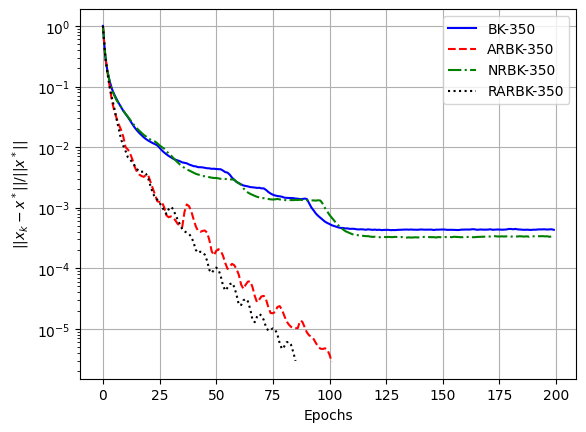

In [13]:
#@title : Errors plots

plt.grid(True)
# plt.title('Errors')
plt.semilogy(Errors_bk, label= 'BK'+ f'-{number_block}', color='blue')
plt.semilogy(Errors_arbk, linestyle='dashed',label= 'ARBK'+ f'-{number_block}', color='red')
plt.semilogy(Errors_nrbk, linestyle='-.',label= 'NRBK'+ f'-{number_block}', color='green')
plt.semilogy(Errors_rarbk, linestyle='dotted',label= 'RARBK'+ f'-{number_block}', color='black')
plt.xlabel("Epochs")
plt.ylabel('$||x_k - x^*||/||x^*||$')
plt.legend()

# name = 'errors{}_{}.png'.format(m,n)
# plt.savefig(name, format='png', dpi=100, bbox_inches='tight')
# files.download(name)
plt.show()